## Language Analysis of Alexithymic Discourse

<hr>

Alexithymic Language Project / raul@psicobotica.com / V2 release (sept 2020)

<hr>

### Bag of Words Model

- Compute word frequencies.
- Create most frequent words BoW vector for each document. 
- Save the word BoW model.
- Dimensionality reduction with PCA (2D and 3D). 
- Visual representation of class in PCA projected vector space.
- Compute stem frequencies.
- Create most frequent stems BoW vector for each document. 
- Save the stem BoW model.
- Dimensionality reduction with PCA and t-SNE.
- Visual representation of class in PCA/t-SNE projected vector space.

## Load features dataset
- Data is already pre-processed (1-Preprocessing). 
- Basic NLP features are already calculated (2-Features).  

In [21]:
import pandas as pd 
import numpy as np

In [2]:
feats_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/alexithymic-lang/master/data/Prolexitim_v2_features.csv"

alex_df = pd.read_csv(feats_dataset_path, header=0, delimiter=";")

In [3]:
alex_df.columns

Index(['Code', 'TAS20', 'F1', 'F2', 'F3', 'Gender', 'Age', 'Card',
       'T_Metaphors', 'T_ToM', 'T_FP', 'T_Interpret', 'T_Desc', 'T_Confussion',
       'Text', 'Alex_A', 'Alex_B', 'Words', 'Sentences', 'Tokens',
       'Tokens_Stop', 'Tokens_Stem_P', 'Tokens_Stem_S', 'POS', 'NER', 'DEP',
       'Lemmas_CNLP', 'Lemmas_Spacy', 'Chars', 'avgWL', 'avgSL', 'Pun_Count',
       'Stop_Count', 'RawTokens', 'Title_Count', 'Upper_Count', 'PRON_Count',
       'DET_Count', 'ADV_Count', 'VERB_Count', 'PROPN_Count', 'NOUN_Count',
       'NUM_Count', 'PUNCT_Count', 'SYM_Count', 'SCONJ_Count', 'CCONJ_Count',
       'INTJ_Count', 'AUX_Count', 'ADP_Count', 'ADJ_Count', 'PRON_Ratio',
       'DET_Ratio', 'ADV_Ratio', 'VERB_Ratio', 'PROPN_Ratio', 'NOUN_Ratio',
       'NUM_Ratio', 'PUNCT_Ratio', 'SYM_Ratio', 'SCONJ_Ratio', 'CCONJ_Ratio',
       'INTJ_Ratio', 'AUX_Ratio', 'ADP_Ratio', 'ADJ_Ratio', 'TTR', 'HTR'],
      dtype='object')

In [4]:
alex_df.head()

,Code,TAS20,F1,F2,F3,Gender,Age,Card,T_Metaphors,T_ToM,...,PUNCT_Ratio,SYM_Ratio,SCONJ_Ratio,CCONJ_Ratio,INTJ_Ratio,AUX_Ratio,ADP_Ratio,ADJ_Ratio,TTR,HTR
0,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,1,0,1,...,0.062500,0.0,0.062500,0.000000,0.0,0.125000,0.125000,0.000000,0.562500,0.875000
1,bc39e22ca5dba59fbd97c27987878f56,40,16,9,15,2,22,13HM,0,1,...,0.142857,0.0,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.857143,1.000000
2,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,1,0,1,...,0.103448,0.0,0.103448,0.068966,0.0,0.034483,0.103448,0.172414,0.344828,0.793103
3,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,9VH,0,1,...,0.083333,0.0,0.041667,0.041667,0.0,0.125000,0.208333,0.083333,0.458333,0.875000
4,20cd825cadb95a71763bad06e142c148,40,12,10,18,2,22,13HM,0,1,...,0.100000,0.0,0.100000,0.000000,0.0,0.100000,0.100000,0.200000,0.900000,1.000000


## Create standard BoW Model

In [5]:
import ast

In [6]:
# Word Frequency
word_Freq = {}

# for each sentence in corpus, update word frequency dictionary
for tokens in alex_df.Tokens_Stop:
    token_list = ast.literal_eval(tokens)
    for token in token_list:
        if token not in word_Freq.keys():
            word_Freq[token] = 1
        else:
            word_Freq[token] += 1

In [7]:
print("Frequency of word 'niño' is %d." % word_Freq.get("niño"))
print("Frequency of word 'niña' is %d." % word_Freq.get("niña"))

Frequency of word 'niño' is 85.
Frequency of word 'niña' is 2.


In [8]:
print("We have %d different words in our corpus." % (len(word_Freq)))

We have 2710 different words in our corpus.


In [9]:
# sorted_word_Freq = {k: v for k, v in sorted(word_Freq.items(), key=lambda item: item[1])}
word_Sorted = []
for w in sorted(word_Freq, key=word_Freq.get, reverse=True):
    word_Sorted.append((w, word_Freq[w]))

In [10]:
word_Sorted[0:20]

[('niño', 85),
 ('violín', 85),
 ('hombre', 64),
 ('día', 61),
 ('tocar', 53),
 ('mujer', 47),
 ('ser', 31),
 ('padres', 30),
 ('tras', 30),
 ('casa', 30),
 ('después', 28),
 ('trabajo', 28),
 ('grupo', 27),
 ('hacer', 26),
 ('cascada', 25),
 ('vida', 25),
 ('si', 23),
 ('mientras', 23),
 ('quería', 22),
 ('música', 22)]

In [11]:
#Let's get the 400 most frequent words to build document vectors
import heapq

most_Freq_Words = heapq.nlargest(400, word_Freq, key=word_Freq.get)

In [12]:
print(heapq.nlargest(20, word_Freq, key=word_Freq.get))

['niño', 'violín', 'hombre', 'día', 'tocar', 'mujer', 'ser', 'padres', 'tras', 'casa', 'después', 'trabajo', 'grupo', 'hacer', 'cascada', 'vida', 'si', 'mientras', 'quería', 'música']


In [13]:
len(most_Freq_Words)

400

In [76]:
# Name the new columns for feature vectors 
# BoW-i are the BoW Doc2Vec dimensions
feat_cols = [ 'BoW-'+str(i) for i in range(len(most_Freq_Words)) ]

In [77]:
# Create an empty df for BoW vectors (same size as the number of docs)
feats_df = pd.DataFrame(0, index=range(len(alex_df)), dtype='int', columns=feat_cols)

In [78]:
feats_df.describe()

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,BoW-390,BoW-391,BoW-392,BoW-393,BoW-394,BoW-395,BoW-396,BoW-397,BoW-398,BoW-399
count,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
for i in range(0, len(alex_df)):  # For each document token list
    token_list = ast.literal_eval(alex_df['Tokens_Stop'].iloc[i])
    vecPos = 0    
    for token in most_Freq_Words:  # For each token in most frequent tokens
        if token in token_list:
            feats_df['BoW-'+str(vecPos)].iloc[i] = 1   # Token vecPos is present in this doc.
        else: 
            feats_df['BoW-'+str(vecPos)].iloc[i] = 0   # Token vecPos is not present in this doc.
        vecPos += 1

In [80]:
feats_df.describe()

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,BoW-390,BoW-391,BoW-392,BoW-393,BoW-394,BoW-395,BoW-396,BoW-397,BoW-398,BoW-399
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.194226,0.154856,0.144357,0.131234,0.107612,0.110236,0.068241,0.068241,0.070866,0.073491,...,0.007874,0.007874,0.007874,0.007874,0.007874,0.007874,0.007874,0.007874,0.005249,0.007874
std,0.396124,0.362243,0.351913,0.338100,0.310297,0.313596,0.252491,0.252491,0.256939,0.261284,...,0.088502,0.088502,0.088502,0.088502,0.088502,0.088502,0.088502,0.088502,0.072357,0.088502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Create BoW vectors in one column: 
'''
for i in range(0, len(alex_df)):
    BoW_Vec = []
    token_list = ast.literal_eval(alex_df['Tokens_Stop'].iloc[i])
    for token in most_Freq_Words:
        if token in token_list:
            BoW_Vec.append(1)
        else: 
            BoW_Vec.append(0)
    # print(BoW_Vec)
    alex_df['BoW-Vector'].iloc[i] = BoW_Vec
'''

"\nfor i in range(0, len(alex_df)):\n    BoW_Vec = []\n    token_list = ast.literal_eval(alex_df['Tokens_Stop'].iloc[i])\n    for token in most_Freq_Words:\n        if token in token_list:\n            BoW_Vec.append(1)\n        else: \n            BoW_Vec.append(0)\n    # print(BoW_Vec)\n    alex_df['BoW-Vector'].iloc[i] = BoW_Vec\n"

In [81]:
# Add the label and other vbles to the df as a new column
feats_df['Alex_A'] = alex_df['Alex_A'].get_values()
feats_df['Code'] = alex_df['Code'].get_values()
feats_df['F1'] = alex_df['F1'].get_values()
feats_df['F2'] = alex_df['F2'].get_values()
feats_df['F3'] = alex_df['F3'].get_values()
feats_df['Card'] = alex_df['Card'].get_values()

In [82]:
feats_df.sample(4)

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,BoW-396,BoW-397,BoW-398,BoW-399,Alex_A,Code,F1,F2,F3,Card
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,130b8662d2882fa141f2cfc59491167c,17,17,20,11
64,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,481fe8a7d55b142fde7d60832023f522,20,12,9,13HM
118,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,efb2088a8ab28dc16c158813ae396ec8,13,9,13,9BM
290,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,dd272a2168d7832a97f53e400e47c7b7,23,13,28,9VH


### Persist the standard BoW model

In [47]:
# Save Bow Model
BoW_Models_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_Standard_BoW.csv"
feats_df.to_csv(BoW_Models_path, sep=';', encoding='utf-8', index=False)

### Reduce dimensionality to 2 dimensions with PCA
Principal Component Analysis

In [48]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feats_df[feat_cols].values)

In [96]:
# Add the PCA components to the df
feats_df['pca-1'] = pca_result[:,0]
feats_df['pca-2'] = pca_result[:,1]

In [97]:
feats_df.sample(4)

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,BoW-398,BoW-399,Alex_A,Code,F1,F2,F3,Card,pca-1,pca-2
293,1,1,0,0,0,0,0,1,0,0,...,0,0,0,bd0f72617b5ea094ac4accb397070d8d,20,14,14,1,2.082518,0.251924
24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,3a7bc6a0450eda9cc016324a2ee5b749,18,20,18,11,-0.239922,-0.381020
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,481fe8a7d55b142fde7d60832023f522,20,12,9,9VH,-0.314225,-0.320620
112,0,0,1,1,0,0,0,0,0,0,...,0,0,0,d14d5cbe51c764156f09db8a15d79a97,18,12,19,9VH,-0.488537,0.116781


In [98]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.05008513 0.02720684]


### Reduce dimensionality to 3 dimensions with PCA
Principal Component Analysis

In [99]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(feats_df[feat_cols].values)

feats_df['pca-3d-1'] = pca_result[:,0]
feats_df['pca-3d-2'] = pca_result[:,1]
feats_df['pca-3d-3'] = pca_result[:,2]

In [100]:
feats_df.sample(4)

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,Code,F1,F2,F3,Card,pca-1,pca-2,pca-3d-1,pca-3d-2,pca-3d-3
256,0,0,1,0,0,1,0,0,0,0,...,3617deeecc419db6fc339e72c2b6d699,14,14,15,13HM,-0.553280,1.045499,-0.553280,1.045499,-0.063401
0,1,0,0,0,0,0,0,0,0,0,...,bc39e22ca5dba59fbd97c27987878f56,16,9,15,1,0.429786,-0.056197,0.429786,-0.056197,-0.360772
286,0,0,0,0,0,0,0,0,0,0,...,f0b6d248520d5d24a7553a41ee5faaa9,11,15,12,9VH,-0.228902,-0.658919,-0.228902,-0.658919,0.388691
180,1,0,0,0,0,0,1,0,0,0,...,28c8077263a82f72c525546ff0ddd3e5,13,12,16,10,0.310744,-0.022565,0.310744,-0.022565,-0.308249


In [101]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.05008513 0.02720684 0.02264775]


### Visual 2D representation of classes

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

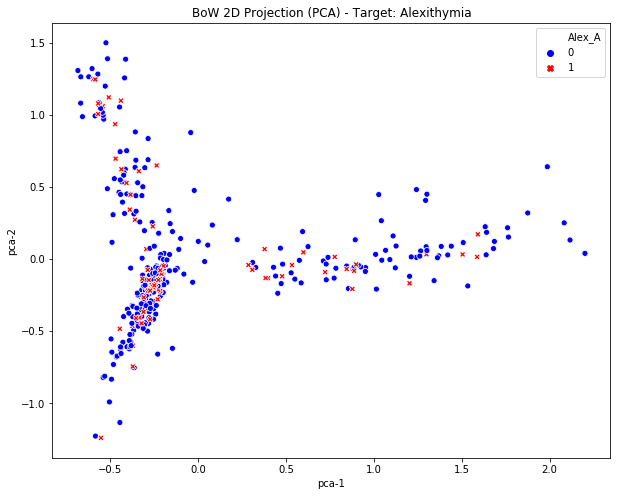

In [59]:
plt.figure(figsize=(10,8))
plt.title("BoW 2D Projection (PCA) - Target: Alexithymia")
markers = {1: "X", 0: "o"}
sns.scatterplot(
    x="pca-1", 
    y="pca-2",
    hue="Alex_A",
    style="Alex_A",
    palette=sns.color_palette(["#0000ff", "#ff0000"]),
    data=feats_df,
    markers=markers,
    legend="full",
    alpha=1
)

In [83]:
# Check Card as the target class
feats_df.Card.describe()

count     381
unique     16
top       9VH
freq       89
Name: Card, dtype: object

In [84]:
feats_df.Card.value_counts()

9VH     89
1       85
11      83
13HM    81
12VN     8
3VH      6
7VH      6
13N      5
13V      5
10       4
18NM     3
13VH     2
9BM      1
10N      1
15HM     1
!·HM     1
Name: Card, dtype: int64

In [102]:
# drop under-represented cards
cards_df = feats_df.drop(feats_df[(feats_df.Card != '9VH') & (feats_df.Card != '1') & (feats_df.Card != '11') & (feats_df.Card != '13HM')].index)

In [103]:
cards_df.Card.value_counts()

9VH     89
1       85
11      83
13HM    81
Name: Card, dtype: int64

In [104]:
cards_df.sample(4)

,BoW-0,BoW-1,BoW-2,BoW-3,BoW-4,BoW-5,BoW-6,BoW-7,BoW-8,BoW-9,...,Code,F1,F2,F3,Card,pca-1,pca-2,pca-3d-1,pca-3d-2,pca-3d-3
232,0,0,0,1,0,0,1,0,0,0,...,039dd653b1739fddd915a54b67f98585,19,17,19,9VH,-0.193947,-0.177589,-0.193947,-0.177589,1.055796
264,0,0,0,0,0,0,0,0,0,0,...,af67553b2ca884d23497afdf7a2b10d8,14,10,12,13HM,0.081977,0.236519,0.081977,0.236519,-0.092137
307,0,0,0,0,0,0,0,0,0,0,...,662e3b511b407d83fcc6e41adb79829d,16,10,11,11,-0.246904,-0.174305,-0.246904,-0.174305,-0.379009
162,0,0,0,0,0,0,0,0,0,0,...,3d7431322c06c2f0836a2432d477973f,14,12,18,13HM,-0.236541,-0.047154,-0.236541,-0.047154,-0.176549


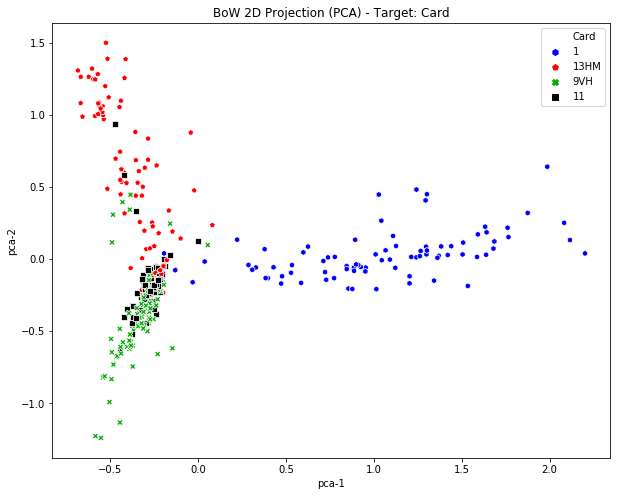

In [112]:
plt.figure(figsize=(10,8))
plt.title("BoW 2D Projection (PCA) - Target: Card")
markers = {'9VH': "X", '1': "h", '11': "s", '13HM': "p"}
sns.scatterplot(
    x="pca-1", 
    y="pca-2",
    hue="Card",
    style="Card",
    palette=sns.color_palette(["#0000ff", "#ff0000", "#00aa00", "#000000"]),
    data=cards_df,
    markers=markers,
    legend="full",
    alpha=1
)

### Visual 3D representations of classes

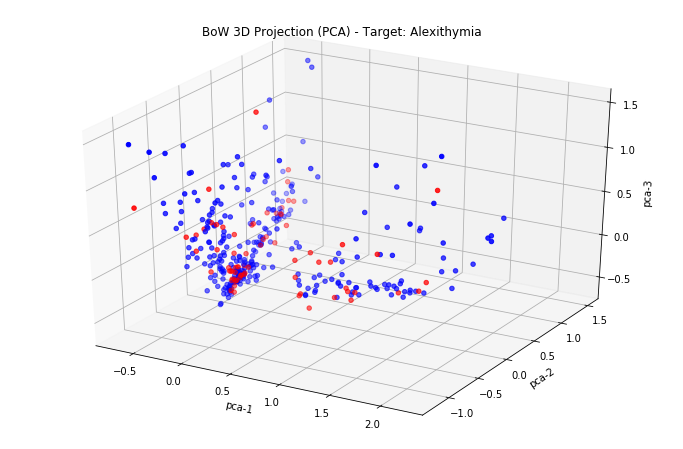

In [114]:
colors = {1:'red', 0:'blue'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=feats_df["pca-3d-1"], 
    ys=feats_df["pca-3d-2"], 
    zs=feats_df["pca-3d-3"], 
    c=feats_df['Alex_A'].apply(lambda x: colors[x])
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')
plt.title("BoW 3D Projection (PCA) - Target: Alexithymia")
plt.show()

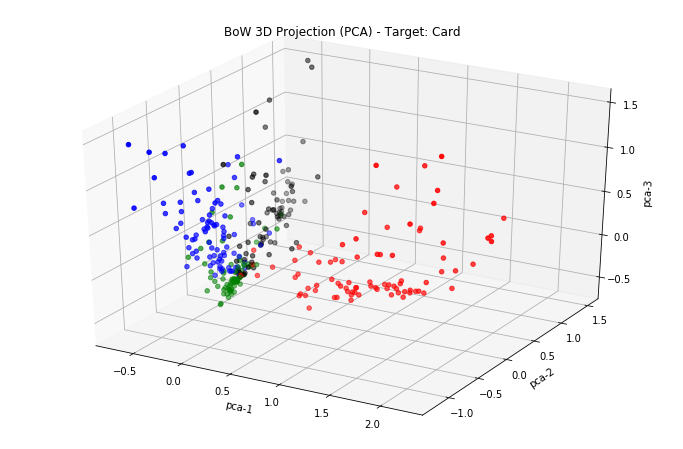

In [113]:
colors = {'9VH': 'blue', '1': 'red', '11': 'green', '13HM': 'black'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=cards_df["pca-3d-1"], 
    ys=cards_df["pca-3d-2"], 
    zs=cards_df["pca-3d-3"], 
    c=cards_df['Card'].apply(lambda x: colors[x])
)
ax.set_xlabel('pca-1')
ax.set_ylabel('pca-2')
ax.set_zlabel('pca-3')
plt.title("BoW 3D Projection (PCA) - Target: Card")
plt.show()

## Create a Stem BoW Model

In [198]:
# Stem (Snowball) Frequency
stem_Freq = {}

# for each sentence in corpus, update stem frequency dictionary
for tokens in alex_df.Tokens_Stem_S:
    token_list = ast.literal_eval(tokens)
    for token in token_list:
        if token not in stem_Freq.keys():
            stem_Freq[token] = 1
        else:
            stem_Freq[token] += 1

In [199]:
print("We have %d words and %d stems." % (len(word_Freq),len(stem_Freq)))

We have 2710 words and 1779 stems.


In [200]:
print("Frequency of word 'niñ' is %d." % stem_Freq.get("niñ"))
print("Frequency of word 'hombr' is %d." % stem_Freq.get("hombr"))

Frequency of word 'niñ' is 92.
Frequency of word 'hombr' is 81.


In [201]:
most_Freq_Stems = heapq.nlargest(50, stem_Freq, key=stem_Freq.get)

In [202]:
# 20 most common stems
print(heapq.nlargest(20, stem_Freq, key=stem_Freq.get))

['violin', 'niñ', 'hombr', 'dia', 'toc', 'trabaj', 'hac', 'descans', 'muj', 'sol', 'padr', 'com', 'lleg', 'sab', 'pas', 'quer', 'pod', 'cas', 'gust', 'ser']


In [203]:
stem_Sorted = []
for w in sorted(stem_Freq, key=stem_Freq.get, reverse=True):
    stem_Sorted.append((w, stem_Freq[w]))

In [204]:
stem_Sorted[0:10]

[('violin', 103),
 ('niñ', 92),
 ('hombr', 81),
 ('dia', 66),
 ('toc', 64),
 ('trabaj', 64),
 ('hac', 57),
 ('descans', 48),
 ('muj', 47),
 ('sol', 44)]

In [205]:
# Create a binary vector representation for each document
# alex_df['BoW-Stem-Vector'] = ""

In [206]:
'''
for i in range(0, len(alex_df)):
    Stem_Vec = []
    token_list = ast.literal_eval(alex_df['Tokens_Stem_S'].iloc[i])
    for token in most_Freq_Stems:
        if token in token_list:
            Stem_Vec.append(1)
        else: 
            Stem_Vec.append(0)
    alex_df['BoW-Stem-Vector'].iloc[i] = Stem_Vec
'''

"\nfor i in range(0, len(alex_df)):\n    Stem_Vec = []\n    token_list = ast.literal_eval(alex_df['Tokens_Stem_S'].iloc[i])\n    for token in most_Freq_Stems:\n        if token in token_list:\n            Stem_Vec.append(1)\n        else: \n            Stem_Vec.append(0)\n    alex_df['BoW-Stem-Vector'].iloc[i] = Stem_Vec\n"

In [207]:
# Name the new columns for feature vectors 
# BoW-i are the BoW Doc2Vec dimensions
s_feat_cols = [ 'BoW-S-'+str(i) for i in range(len(most_Freq_Stems)) ]

In [208]:
# Create an empty df for BoW vectors (same size as the number of docs)
s_feats_df = pd.DataFrame(0, index=range(len(alex_df)), dtype='int', columns=s_feat_cols)

In [209]:
for i in range(0, len(alex_df)):  # For each document token list
    token_list = ast.literal_eval(alex_df['Tokens_Stem_S'].iloc[i])
    vecPos = 0    
    for token in most_Freq_Stems:  # For each token in most frequent tokens
        if token in token_list:
            s_feats_df['BoW-S-'+str(vecPos)].iloc[i] = 1   # Token vecPos is present in this doc.
        else: 
            s_feats_df['BoW-S-'+str(vecPos)].iloc[i] = 0   # Token vecPos is not present in this doc.
        vecPos += 1

In [210]:
s_feats_df.sample(4)

,BoW-S-0,BoW-S-1,BoW-S-2,BoW-S-3,BoW-S-4,BoW-S-5,BoW-S-6,BoW-S-7,BoW-S-8,BoW-S-9,...,BoW-S-40,BoW-S-41,BoW-S-42,BoW-S-43,BoW-S-44,BoW-S-45,BoW-S-46,BoW-S-47,BoW-S-48,BoW-S-49
180,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# Add the label and other vbles to the df as a new column
s_feats_df['Alex_A'] = alex_df['Alex_A'].get_values()
s_feats_df['Code'] = alex_df['Code'].get_values()
s_feats_df['F1'] = alex_df['F1'].get_values()
s_feats_df['F2'] = alex_df['F2'].get_values()
s_feats_df['F3'] = alex_df['F3'].get_values()
s_feats_df['Card'] = alex_df['Card'].get_values()

In [212]:
s_feats_df.sample(4)

,BoW-S-0,BoW-S-1,BoW-S-2,BoW-S-3,BoW-S-4,BoW-S-5,BoW-S-6,BoW-S-7,BoW-S-8,BoW-S-9,...,BoW-S-46,BoW-S-47,BoW-S-48,BoW-S-49,Alex_A,Code,F1,F2,F3,Card
186,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,29d3a4409792f6a28f9eefbdd7ebcd37,10,12,21,9VH
327,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,5bc3c462dc659d90b419ac121963c6a7,29,20,23,11
111,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,d14d5cbe51c764156f09db8a15d79a97,18,12,19,1
45,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,8a17721b00de1ac4e9e771b3d06c3131,13,13,15,13HM


### Persist the Stem BoW Model

In [213]:
# Save Bow Model
S_BoW_Model_path = "D:\\Dropbox-Array2001\\Dropbox\\DataSets\\Prolexitim-Dataset\\Prolexitim_v2_Stem_BoW.csv"
s_feats_df.to_csv(S_BoW_Model_path, sep=';', encoding='utf-8', index=False)

### Reduce dimensionality from 50 to 25 with PCA, then to 3 dimensions with t-SNE
Principal Component Analysis

In [214]:
from sklearn.manifold import TSNE

In [215]:
# Using PCA to reduce to 50 dimensions
pca_50 = PCA(n_components=25)
pca_result_50 = pca_50.fit_transform(s_feats_df[s_feat_cols].values)

In [216]:
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.758308759678781


In [217]:
# Using t-SNE to reduce from 50 to 3 dimensions
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

In [218]:
s_feats_df['tsne-1'] = tsne_pca_results[:,0]
s_feats_df['tsne-2'] = tsne_pca_results[:,1]
s_feats_df['tsne-3'] = tsne_pca_results[:,2]

In [219]:
s_feats_df.sample(4)

,BoW-S-0,BoW-S-1,BoW-S-2,BoW-S-3,BoW-S-4,BoW-S-5,BoW-S-6,BoW-S-7,BoW-S-8,BoW-S-9,...,BoW-S-49,Alex_A,Code,F1,F2,F3,Card,tsne-1,tsne-2,tsne-3
362,0,0,0,0,0,0,0,0,0,0,...,0,1,1c9636c6a36ba79f847db0589528df65,26,19,21,11,5.248827,-9.115051,4.819493
261,1,0,0,0,0,0,0,0,0,0,...,0,0,af67553b2ca884d23497afdf7a2b10d8,14,10,12,1,-25.288528,4.086903,-7.668631
107,0,0,0,0,0,0,0,0,0,0,...,0,0,65e24a82d12f4a91135102a8a7eaab06,17,9,13,1,-14.694313,2.637866,1.957240
201,1,1,0,0,1,0,1,0,0,0,...,0,0,c2c1f499a1f3099f965c62ce27b22160,16,7,13,1,-14.530025,-19.054628,6.321026


### Visual 3D Representations of classes
t-SNE Projection to 3D of Stem BoW vectors

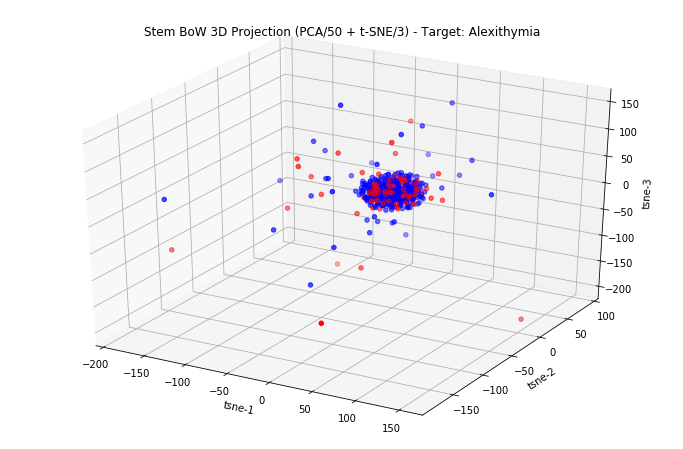

In [220]:
colors = {1:'red', 0:'blue'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=s_feats_df["tsne-1"], 
    ys=s_feats_df["tsne-2"], 
    zs=s_feats_df["tsne-3"], 
    c=s_feats_df['Alex_A'].apply(lambda x: colors[x])
)
ax.set_xlabel('tsne-1')
ax.set_ylabel('tsne-2')
ax.set_zlabel('tsne-3')
plt.title("Stem BoW 3D Projection (PCA/50 + t-SNE/3) - Target: Alexithymia")
plt.show()

In [221]:
# drop under-represented cards
s_cards_df = s_feats_df.drop(s_feats_df[(s_feats_df.Card != '9VH') & (s_feats_df.Card != '1') & (s_feats_df.Card != '11') & (s_feats_df.Card != '13HM')].index)

In [222]:
# Same for cards
s_cards_df.Card.value_counts()

9VH     89
1       85
11      83
13HM    81
Name: Card, dtype: int64

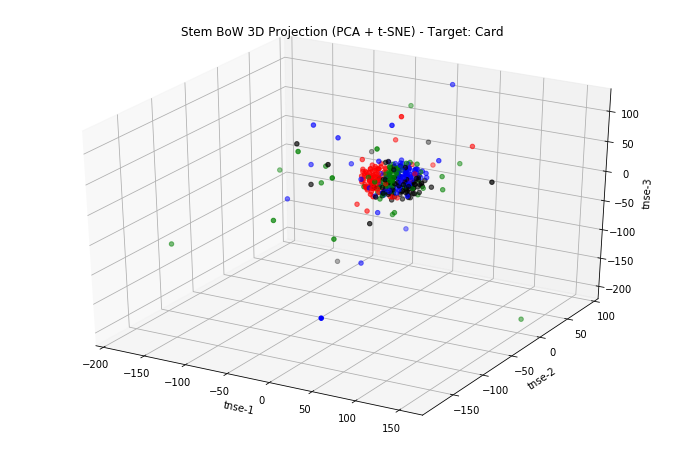

In [223]:
colors = {'9VH': 'blue', '1': 'red', '11': 'green', '13HM': 'black'}
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=s_cards_df["tsne-1"], 
    ys=s_cards_df["tsne-2"], 
    zs=s_cards_df["tsne-3"], 
    c=s_cards_df['Card'].apply(lambda x: colors[x])
)
ax.set_xlabel('tnse-1')
ax.set_ylabel('tnse-2')
ax.set_zlabel('tnse-3')
plt.title("Stem BoW 3D Projection (PCA + t-SNE) - Target: Card")
plt.show()